# Pfam, Foldseek Network and HHblits comparison

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Compare number of HHblit hits, Foldseek hits and Foldseek Network hits for hallmark proteins

In [ ]:
foldseek_file = "~/8_hallmark_proteins_identification/hallmark_protein_vs_Viro3D/hallmark_protein_vs_Viro3D.tsv"
df_foldseek = pd.read_csv(foldseek_file, sep='\t')

In [15]:
df_foldseek[df_foldseek['evalue'] <= 1e-5]['query'].value_counts()

query
6c_8e86_polio_vp3_sjr                     1932
6b_8e86_polio_vp2_sjr                     1500
1_4r0e_polio_rdrp                         1449
6a_8e86_polio_vp1_sjr                     1394
3C_protease_7l8h                           787
5_5a9k_papilloma_s3h                       680
Spondweni_E_6ZQI_A_MODEL_1                 596
VSV_protein_L_mRNA_capping_domain_6u1x     547
3_2py5_phi29_pPolB                         542
SARS-CoV-2_RNA_helicase_7nio               529
dUTPase_6mjk                               293
HCMV_Gb_7KDP_A_MODEL_1                     274
RSV_F_6APB_A_MODEL_1                       234
7_6b1t_adeno_hexon_djr                     204
4_8h56_circovirus_rcre                     184
8b_6lgl_vzv_hk97                           118
2_1hmv_hiv_rt_p66                          118
SARS2_S_6VYB_A_MODEL_1                      65
Name: count, dtype: int64

In [ ]:
foldseek_polb_hits = list(df_foldseek[
    (df_foldseek['evalue'] <= 1e-5) &
    (df_foldseek['query'] == '3_2py5_phi29_pPolB')]['Viro3D ID'].unique())

In [ ]:
network_file = "../foldseek_1e-5_all_hallmark_vs_network.csv"
df_network = pd.read_csv(network_file)

In [4]:
df_network['hallmark'].value_counts()

hallmark
1_4r0e_polio_rdrp             2609
6c_8e86_polio_vp3_sjr         2359
Spondweni_E_6ZQI_A_MODEL_1     672
3_2py5_phi29_pPolB             658
HCMV_Gb_7KDP_A_MODEL_1         513
7_6b1t_adeno_hexon_djr         313
RSV_F_6APB_A_MODEL_1           259
2_1hmv_hiv_rt_p66              122
8b_6lgl_vzv_hk97               119
Name: count, dtype: int64

In [ ]:
hhblits_summary_file = "./pfam_hhblits_foldseek_summary.csv"
hhblits_summary_df = pd.read_csv(hhblits_summary_file)

In [28]:
hhblits_summary_df = hhblits_summary_df[(hhblits_summary_df['tool'] != 'Pfam') &
                                        (hhblits_summary_df['hhblits_iteration'] == 1)]

In [29]:
hhblits_summary_df.head(1)

,probe,tool,hhblits_iteration,hits
5,RdRp,HHblits,1,1387


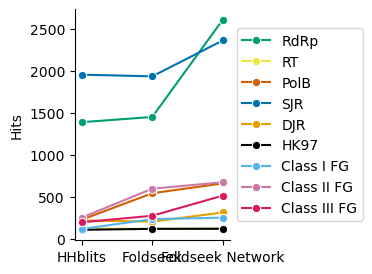

In [ ]:
# plot the distribution of the number of clusters in the hallmark community with seaborn
plt.figure(figsize=(2, 3))


hallmark_list = hhblits_summary_df['probe'].unique()

color_map = {
    'RdRp': '#009E73', 
    'RT': '#F0E442', 
    'PolB': '#D55E00',
    'SJR': '#0072B2',
    'DJR': '#E69F00',
    'HK97': '#000000',
    'Class I FG': '#56B4E9',
    'Class II FG': '#CC79A7',
    'Class III FG': '#D81B60',
}

for hallmark in hallmark_list:
    sns.lineplot(data=hhblits_summary_df[hhblits_summary_df['probe']==hallmark], x='tool', y='hits', marker='o', label=f'{hallmark}', color=color_map[hallmark])

# move the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# relabel the x-axis
plt.xlabel('')

# relabel the x-ticks
plt.xticks(range(3), ['HHblits', 'Foldseek', 'Foldseek Network'])

# relabel the y-axis
plt.ylabel('Hits')

sns.despine()

plt.savefig('./figures/hhblits_foldseek_foldseek_network_hallmark_hits.svg', bbox_inches='tight')

plt.show()

### Sequence identity of Foldseek Network and HHblits hits

In [ ]:
foldseek_file = "./data/foldseek_RdRp_probe_vs_RdRp_network_hits.tsv"
foldseek_df = pd.read_csv(foldseek_file, sep='\t')

In [ ]:
foldseek_df['ID'] = foldseek_df['target'].str[3:-8]

In [14]:
foldseek_df.sort_values(by=['pident'], ascending=False)

,query,target,pident,fident,alnlen,mismatch,gapopen,qstart,qend,qlen,...,tstart,tend,tlen,tcov,evalue,bits,prob,lddt,alntmscore,ID
24,1_4r0e_polio_rdrp,CF-CAA24461.1.1.10_10556_relaxed,99.3,0.993,452,3,0,10,461,461,...,2,453,453,0.998,2.475000e-80,3370,1.000,0.9569,0.9951,CAA24461.1.1.10_10556
35,1_4r0e_polio_rdrp,CF-AAQ02680.1.1.10_10565_relaxed,98.4,0.984,452,6,1,10,461,461,...,2,452,452,0.998,1.850000e-79,3325,1.000,0.9537,0.9930,AAQ02680.1.1.10_10565
20,1_4r0e_polio_rdrp,CF-CAA24465.1.1.10_10557_relaxed,98.4,0.984,452,7,0,10,461,461,...,2,453,453,0.998,1.885000e-80,3374,1.000,0.9565,0.9951,CAA24465.1.1.10_10557
26,1_4r0e_polio_rdrp,CF-AAQ02679.1.1.10_10566_relaxed,98.4,0.984,452,7,0,10,461,461,...,2,453,453,0.998,2.759000e-80,3366,1.000,0.9562,0.9948,AAQ02679.1.1.10_10566
17,1_4r0e_polio_rdrp,CF-CAA24465.1.9_10557_relaxed,98.4,0.984,460,7,0,2,461,461,...,185,644,644,0.714,1.691000e-80,3388,1.000,0.9636,0.9947,CAA24465.1.9_10557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,1_4r0e_polio_rdrp,CF-AXY55022.1.1.2_9479_relaxed,7.3,0.073,547,303,34,47,435,461,...,186,686,739,0.678,1.204000e-01,44,0.301,0.3070,0.4314,AXY55022.1.1.2_9479
2380,1_4r0e_polio_rdrp,CF-QLA47051.1.1.2_9613_relaxed,7.2,0.072,567,287,35,67,457,461,...,186,689,744,0.677,2.928000e-02,46,0.353,0.2962,0.3295,QLA47051.1.1.2_9613
2572,1_4r0e_polio_rdrp,CF-AJG39246.1.1.1_9461_relaxed,6.9,0.069,472,237,24,120,438,461,...,131,553,587,0.721,3.506000e+00,17,0.016,0.2841,0.2992,AJG39246.1.1.1_9461
2559,1_4r0e_polio_rdrp,CF-AFP93553.1_9283_relaxed,6.8,0.068,450,258,25,102,435,461,...,1000,1404,2066,0.196,1.551000e+00,23,0.045,0.2960,0.3285,AFP93553.1_9283


In [4]:
import pandas as pd
import re

def parse_three_line_blocks(filename):
    data = []

    with open(filename, 'r') as f:
        lines = f.readlines()

    # Loop through lines in blocks of 3
    for i in range(len(lines) - 2):
        
        if lines[i].startswith("No "):
            
            no_line = lines[i].strip()
            id_line = lines[i + 1].strip()
            stats_line = lines[i + 2].strip()

            # Extract "No" number
            no_match = re.match(r"No (\d+)", no_line)
            no = int(no_match.group(1)) if no_match else None

            # Extract identifier
            identifier = id_line.lstrip(">")

            # Extract all stats using regex
            stats = dict(re.findall(r'(\w+)=([\w\.\-e%]+)', stats_line))

            # Build row
            row = {
                "No": no,
                "ID": identifier,
                "Probab": float(stats.get("Probab", 0)),
                "E-value": stats.get("E-value", None),
                "Score": float(stats.get("Score", 0)),
                "Aligned_cols": int(stats.get("Aligned_cols", 0)),
                "Identities": float(stats.get("Identities", None)[:-1]),
                "Similarity": float(stats.get("Similarity", 0)),
                "Sum_probs": float(stats.get("Sum_probs", 0)),
                "Template_Neff": float(stats.get("Template_Neff", 0)),
            }

            data.append(row)

    return pd.DataFrame(data)

In [ ]:
file_path = "./data/RdRp_1_iteration.hhr"
df = parse_three_line_blocks(file_path)

In [22]:
df.sort_values(by=['Identities'], ascending=False)

,No,ID,Probab,E-value,Score,Aligned_cols,Identities,Similarity,Sum_probs,Template_Neff
11,12,CAA24461.1.1.10_10556,100.00,None,525.97,451,99.0,1.498,418.4,9.5
12,13,AAQ02680.1.1.10_10565,100.00,None,524.20,450,99.0,1.496,416.0,9.6
17,18,AAQ02680.1.11_10565,100.00,None,523.87,460,99.0,1.499,424.4,9.6
13,14,AAQ02684.1.10_10569,100.00,None,526.76,460,98.0,1.491,423.7,9.5
24,25,CAA25444.1.1.10_10561,100.00,None,517.21,451,98.0,1.488,417.6,9.6
...,...,...,...,...,...,...,...,...,...,...
1046,1047,BAA09891.1.1.14_7123,99.33,None,144.28,315,12.0,0.110,224.1,8.8
1050,1051,AAB66324.1.1.16_7113,99.31,None,142.16,315,12.0,0.093,220.4,8.9
1070,1071,AAA45676.1.1.15_7114,99.17,None,134.65,315,12.0,0.095,217.7,8.7
1337,1338,AAB70695.1.11_7151,93.93,None,61.88,305,12.0,0.037,189.4,7.9


In [42]:
df = pd.merge(df, foldseek_df[['ID', 'pident']], on='ID', how='left')

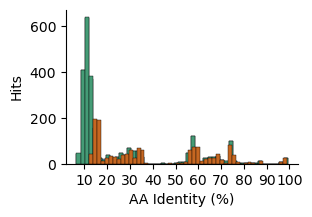

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2))

#plt.style.use('seaborn-v0_8')

ax = sns.despine()
ax = sns.histplot(foldseek_df, x='pident', bins=50, color='#459c76', alpha=1)
ax = sns.histplot(df, x='Identities', bins=50, color='#c66721', alpha=1)

#ax.set_title("Tip distribution by day")
#ax.set_ylabel('Count')
plt.ylabel('Hits')
#ax.set_xlabel('AA Identity (%)')
ax.set_xticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
#ax.set_xticks([10, 30, 50, 70, 90, 100])
plt.xlabel('AA Identity (%)')

plt.savefig("./figures/foldseek_network_vs_hhblits_sequence_identity_histplot.svg", format="svg", bbox_inches='tight')
plt.show()


### HHblits number of hits per iteration

In [ ]:
hhblits_summary_file = "./pfam_hhblits_foldseek_summary.csv"
hhblits_summary_df = pd.read_csv(hhblits_summary_file)

In [5]:
hhblits_summary_df.head(5)

,probe,tool,hhblits_iteration,hits
0,RdRp,Pfam,1,2798
1,RdRp,Pfam,2,2798
2,RdRp,Pfam,3,2798
3,RdRp,Pfam,4,2798
4,RdRp,Pfam,5,2798


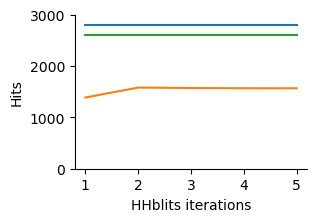

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2))

ax = sns.despine()
ax = sns.lineplot(hhblits_summary_df[hhblits_summary_df['probe']=='RdRp'], x='hhblits_iteration', y='hits', hue='tool', alpha=1, legend=False)

plt.ylabel('Hits')
ax.set_ylim(0,3000)
ax.set_xticks([1,2,3,4,5])
plt.xlabel('HHblits iterations')

plt.savefig("./figures/rdrp_pfam_foldseek_network_hhblits_hits_number_lineplot.svg", format="svg", bbox_inches='tight')
plt.show()

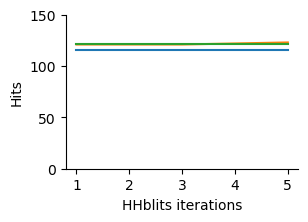

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2))

ax = sns.despine()
ax = sns.lineplot(hhblits_summary_df[hhblits_summary_df['probe']=='RT'], x='hhblits_iteration', y='hits', hue='tool', alpha=1, legend=False)

plt.ylabel('Hits')
ax.set_ylim(0,150)
ax.set_xticks([1,2,3,4,5])
plt.xlabel('HHblits iterations')

plt.savefig("./figures/rt_pfam_foldseek_network_hhblits_hits_number_lineplot.svg", format="svg", bbox_inches='tight')
plt.show()

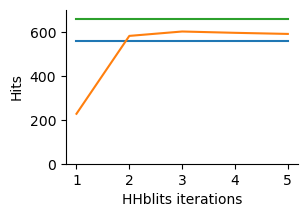

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2))

ax = sns.despine()
ax = sns.lineplot(hhblits_summary_df[hhblits_summary_df['probe']=='PolB'], x='hhblits_iteration', y='hits', hue='tool', alpha=1, legend=False)

plt.ylabel('Hits')
ax.set_ylim(0,700)
ax.set_xticks([1,2,3,4,5])
plt.xlabel('HHblits iterations')

plt.savefig("./figures/polb_pfam_foldseek_network_hhblits_hits_number_lineplot.svg", format="svg", bbox_inches='tight')
plt.show()

## RdRp , RT, and PolB Pfam analysis

- use InterProScan results with multiple Pfam annotations per protein
- find all proteins and viruses that have this annotation
- what is the overlap between these records/viruses and our network search using single probe (RdRp, RT, PolB): E-value 10^-5 and 90% overlap

In [ ]:
viruses_file = "~/2_protein_structure_prediction/metadata/Viro3D_virus_list.csv"
df_viruses = pd.read_csv(viruses_file)

In [3]:
df_viruses[df_viruses['ICTV Realm'] == 'Riboviria'].shape

(2475, 13)

In [4]:
df_viruses[df_viruses['ICTV Realm'] == 'Riboviria']['Genome coverage'].value_counts()

Genome coverage
Complete genome           1671
Complete coding genome     543
Partial genome             261
Name: count, dtype: int64

In [5]:
complete_sort = df_viruses[(df_viruses['ICTV Realm'] == 'Riboviria')&
                           (df_viruses['Genome coverage'] == 'Complete genome')]['ICTV Sort'].unique()

complete_coding_sort = df_viruses[(df_viruses['ICTV Realm'] == 'Riboviria')&
                                  (df_viruses['Genome coverage'] == 'Complete coding genome')]['ICTV Sort'].unique()

partial_sort = df_viruses[(df_viruses['ICTV Realm'] == 'Riboviria')&
                          (df_viruses['Genome coverage'] == 'Partial genome')]['ICTV Sort'].unique()

In [6]:
len(complete_sort), len(complete_coding_sort), len(partial_sort)

(1671, 543, 261)

In [ ]:
proteins_file = "~/2_protein_structure_prediction/metadata/Viro3D_protein_list.csv"
df_proteins = pd.read_csv(proteins_file)

In [ ]:
file_interpro = "~/7_functional_coverage_expansion/interproscan5_analysis/predicted_proteins_results_interproscan-v5.69-101.0.tsv"
col_names = [
    "Protein Accession",
    "Sequence MD5 Digest",
    "Sequence Length",
    "Analysis",
    "Signature Accession",
    "Signature Description",
    "Start Location",
    "Stop Location",
    "Score",
    "Status",
    "Date",
    "InterPro Annotations Accession",
    "InterPro Annotations Description",
    "GO Annotations",
    "Pathways Annotations"
]
df_interpro = pd.read_csv(file_interpro, sep="\t", names=col_names, header=None, index_col=False)

In [9]:
df_pfam = df_interpro[df_interpro["Analysis"] == 'Pfam'][[
    "Protein Accession",
    "Signature Description",
    "InterPro Annotations Accession",
    "InterPro Annotations Description",
    "Start Location",
    "Stop Location"]]

In [10]:
df_pfam = pd.merge(df_pfam, df_proteins[['Viro3D ID', 'ICTV Sort']], left_on='Protein Accession', right_on='Viro3D ID', how='left')
df_pfam.drop(columns=['Protein Accession'], inplace=True)
df_pfam = pd.merge(df_pfam, df_viruses[['ICTV Sort', 'ICTV Realm']], on='ICTV Sort', how='left')

In [11]:
rdrp_virus_sort = df_pfam[(df_pfam['ICTV Realm'] == 'Riboviria') & 
        (df_pfam["Signature Description"].str.contains("RNA polymerase"))]['ICTV Sort'].unique()

rt_virus_sort = df_pfam[(df_pfam['ICTV Realm'] == 'Riboviria') & 
        (df_pfam["Signature Description"].str.contains("DNA polymerase", case=False))]['ICTV Sort'].unique()

polb_virus_sort = df_pfam[(df_pfam['ICTV Realm'] != 'Riboviria') & 
        ((df_pfam["Signature Description"].str.contains("DNA polymerase family B", case=False)) |
         (df_pfam["Signature Description"].str.contains("DNA polymerase type B", case=False)))]['ICTV Sort'].unique()

In [12]:
len(rdrp_virus_sort), len(rt_virus_sort), len(polb_virus_sort)

(2140, 106, 538)

In [13]:
rdrp_protein_id = df_pfam[(df_pfam['ICTV Realm'] == 'Riboviria') & 
        (df_pfam["Signature Description"].str.contains("RNA polymerase"))]['Viro3D ID'].unique()

rt_protein_id = df_pfam[(df_pfam['ICTV Realm'] == 'Riboviria') & 
        (df_pfam["Signature Description"].str.contains("DNA polymerase", case=False))]['Viro3D ID'].unique()

polb_protein_id = df_pfam[(df_pfam['ICTV Realm'] != 'Riboviria') & 
        ((df_pfam["Signature Description"].str.contains("DNA polymerase family B", case=False)) |
         (df_pfam["Signature Description"].str.contains("DNA polymerase type B", case=False)))]['Viro3D ID'].unique()

In [14]:
len(rdrp_protein_id), len(rt_protein_id), len(polb_protein_id)

(2798, 116, 557)

In [15]:
df_pfam[(df_pfam['ICTV Realm'] != 'Riboviria') & 
        ((df_pfam["Signature Description"].str.contains("DNA polymerase family B", case=False)) |
         (df_pfam["Signature Description"].str.contains("DNA polymerase type B", case=False)))]['Signature Description'].value_counts()

Signature Description
DNA polymerase family B                                   397
DNA polymerase family B, exonuclease domain               362
DNA polymerase type B, organellar and viral               183
DNA polymerase family B viral insert                       53
DNA polymerase family B exonuclease domain, N-terminal     42
Name: count, dtype: int64

In [ ]:
hallmark_file = "../foldseek_1e-5_all_hallmark_vs_network.csv"
df_hallmark = pd.read_csv(hallmark_file)

In [17]:
df_hallmark['Viro3D ID'] = df_hallmark['cluster_member'].str[3:-8]

In [18]:
rdrp_hits_virus_sort = list(df_hallmark[(df_hallmark['hallmark'] == '1_4r0e_polio_rdrp') &
                                        (df_hallmark['ictv_realm'] == 'Riboviria')]['ictv_sort'].unique())

rt_hits_virus_sort = list(df_hallmark[(df_hallmark['hallmark'] == '2_1hmv_hiv_rt_p66') &
                                      (df_hallmark['ictv_realm'] == 'Riboviria')]['ictv_sort'].unique())

polb_hits_virus_sort = list(df_hallmark[(df_hallmark['hallmark'] == '3_2py5_phi29_pPolB') &
                                      (df_hallmark['ictv_realm'] != 'Riboviria')]['ictv_sort'].unique())

In [19]:
len(complete_sort), len(complete_coding_sort), len(partial_sort)

(1671, 543, 261)

In [20]:
#len(set(complete_sort) & set(rdrp_hits_virus_sort)), len(set(complete_sort) & set(rt_hits_virus_sort))
len(set(complete_sort) & set(rdrp_virus_sort)), len(set(complete_sort) & set(rt_virus_sort))

(1516, 100)

In [21]:
#len(set(complete_coding_sort) & set(rdrp_hits_virus_sort)), len(set(complete_coding_sort) & set(rt_hits_virus_sort))
len(set(complete_coding_sort) & set(rdrp_virus_sort)), len(set(complete_coding_sort) & set(rt_virus_sort))

(513, 2)

In [22]:
#len(set(partial_sort) & set(rdrp_hits_virus_sort)), len(set(partial_sort) & set(rt_hits_virus_sort))
len(set(partial_sort) & set(rdrp_virus_sort)), len(set(partial_sort) & set(rt_virus_sort))

(111, 4)

In [23]:
df_dict = {"Genome coverage": ["Complete genomes", "Complete coding genomes", "Partial genomes"],
           "RdRp hits": [1516, 513, 111],
           "RT hits": [1516+100, 513+2, 111+4],
           "Missing": [1671, 543, 261]}
df_plot = pd.DataFrame(df_dict)
df_plot

,Genome coverage,RdRp hits,RT hits,Missing
0,Complete genomes,1516,1616,1671
1,Complete coding genomes,513,515,543
2,Partial genomes,111,115,261


<function matplotlib.pyplot.show(close=None, block=None)>

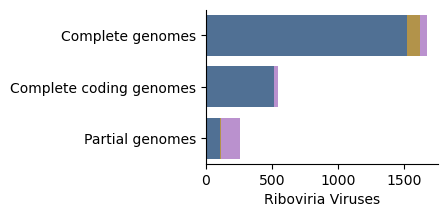

In [ ]:
# change figure size
plt.figure(figsize=(3, 2))
#sns.barplot(data=df_plot, y="realm", x="viruses", color='lightgrey', alpha=1)
sns.barplot(df_plot, y="Genome coverage", x="Missing", color='#bd87d8', alpha=1)
sns.barplot(df_plot, y="Genome coverage", x="RT hits", color='#c39a39', alpha=1)
sns.barplot(df_plot, y="Genome coverage", x="RdRp hits", color='#45709f', alpha=1)
# remove the top and right lines
sns.despine()
# remove the y-axis label
plt.ylabel("")
plt.xlabel("Riboviria Viruses")
# make y-tick labels italic
#plt.yticks(fontstyle='italic')
# save the figure
plt.savefig("./figures/genome_coverage_rdrp_rt_hits_number_barplot_3.svg", format="svg")
plt.show

In [25]:
len(rdrp_hits_virus_sort), len(rt_hits_virus_sort), len(polb_hits_virus_sort)

(2141, 110, 519)

In [26]:
len(set(polb_hits_virus_sort) & set(polb_virus_sort)), len(set(polb_hits_virus_sort) - set(polb_virus_sort)), len(set(polb_virus_sort) - set(polb_hits_virus_sort))

(511, 8, 27)

In [27]:
rdrp_hits_protein_id = list(df_hallmark[(df_hallmark['hallmark'] == '1_4r0e_polio_rdrp') &
                                        (df_hallmark['ictv_realm'] == 'Riboviria')]['Viro3D ID'].unique())

rt_hits_protein_id = list(df_hallmark[(df_hallmark['hallmark'] == '2_1hmv_hiv_rt_p66') &
                                      (df_hallmark['ictv_realm'] == 'Riboviria')]['Viro3D ID'].unique())

polb_hits_protein_id = list(df_hallmark[(df_hallmark['hallmark'] == '3_2py5_phi29_pPolB') &
                                      (df_hallmark['ictv_realm'] != 'Riboviria')]['Viro3D ID'].unique())

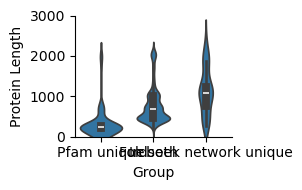

In [ ]:
# Create subsets with category labels
only_rdrp = df_proteins[df_proteins['Viro3D ID'].isin(set(rdrp_protein_id) - set(rdrp_hits_protein_id))].copy()
only_rdrp['Group'] = 'Pfam unique'

in_both = df_proteins[df_proteins['Viro3D ID'].isin(set(rdrp_hits_protein_id) & set(rdrp_protein_id))].copy()
in_both['Group'] = 'In both'

only_hits = df_proteins[df_proteins['Viro3D ID'].isin(set(rdrp_hits_protein_id) - set(rdrp_protein_id))].copy()
only_hits['Group'] = 'Foldseek network unique'

# Concatenate all
combined_df = pd.concat([only_rdrp, in_both, only_hits])

# Plot
plt.figure(figsize=(3, 2))
sns.violinplot(data=combined_df, x='Group', y='Protein Length')
plt.ylim(0, 3000)
sns.despine()
plt.tight_layout()
plt.savefig("./figures/pfam_network_rdrp_hits_protein_length_violinplot.svg", format="svg")
plt.show()

In [ ]:
rdrp_hhblits_file = "./data/RdRp_1_iteration.hhr"
rt_hhblits_file = "./data/RT_1_iteration.hhr"
polb_hhblits_file = "./data/PolB_1_iteration.hhr"

In [21]:
def process_file_to_dataframe(filename):
    columns = [
        "No", "Hit", "Prob", "E-value", "P-value",
        "Score", "SS", "Cols", "Query HMM", "Template HMM", "Template HMM Len"
    ]
    data = []

    with open(filename, 'r') as file:
        for line in file:
            line = line.strip()

            if line and line[0].isdigit():
                parts = line.split()
                #if len(parts) >= len(columns):
                #    data.append(parts[:len(columns)])  # trim excess if needed
                data.append(parts)
    df = pd.DataFrame(data, columns=columns)
    return df

In [28]:
rdrp_hhblits = process_file_to_dataframe(rdrp_hhblits_file)
rt_hhblits = process_file_to_dataframe(rt_hhblits_file)
polb_hhblits = process_file_to_dataframe(polb_hhblits_file)

In [29]:
rdrp_hhblits_hits = list(rdrp_hhblits['Hit'].unique())
rt_hhblits_hits = list(rt_hhblits['Hit'].unique())
polb_hhblits_hits = list(polb_hhblits['Hit'].unique())

In [30]:
len(rdrp_hhblits_hits), len(rt_hhblits_hits), len(polb_hhblits_hits)

(1387, 121, 226)

In [121]:
len(rdrp_hits_protein_id), len(rt_hits_protein_id), len(polb_hits_protein_id)

(2605, 121, 658)

In [122]:
len(set(rdrp_protein_id) - set(rdrp_hits_protein_id)), len(set(rt_protein_id) - set(rt_hits_protein_id)), len(set(polb_protein_id) - set(polb_hits_protein_id))

(238, 0, 42)

In [123]:
len(set(rdrp_hits_protein_id) - set(rdrp_protein_id)), len(set(rt_hits_protein_id) - set(rt_protein_id)), len(set(polb_hits_protein_id) - set(polb_protein_id))

(45, 5, 143)

In [124]:
len(set(rdrp_protein_id) & set(rdrp_hits_protein_id))

2560

In [133]:
len(set(rdrp_protein_id) & set(rdrp_hits_protein_id) & set(hhblits))

1353

/home2/2820395l/anaconda3/envs/bio/lib/python3.12/site-packages/matplotlib_venn/layout/venn3/pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


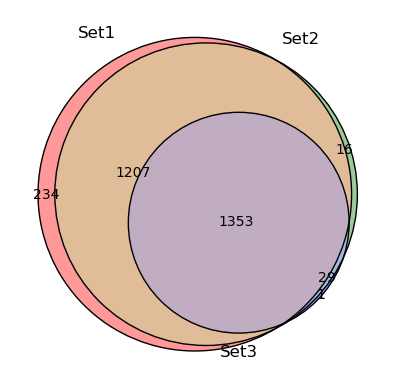

In [ ]:
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt

# Define your sets
set1 = set(rdrp_protein_id)
set2 = set(rdrp_hits_protein_id)
set3 = set(rdrp_hhblits_hits)

# Calculate intersections
only1 = set1 - set2 - set3
only2 = set2 - set1 - set3
only3 = set3 - set1 - set2

shared12 = (set1 & set2) - set3
shared13 = (set1 & set3) - set2
shared23 = (set2 & set3) - set1

shared123 = set1 & set2 & set3

# Create Venn diagram
#venn3([set1, set2, set3], set_labels=('Set1', 'Set2', 'Set3'))

venn3([set1, set2, set3], set_labels=('Set1', 'Set2', 'Set3'))
circles = venn3_circles([set1, set2, set3], linestyle='solid', linewidth=1, color="black")

plt.savefig("./figures/RdRp_Pfam_vs_Network_vs_HHblits_search_venn_diagram.svg", format="svg")
plt.show()

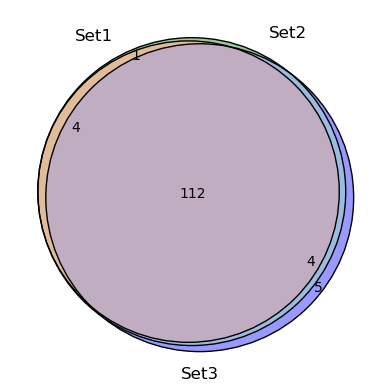

In [ ]:
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt

# Define your sets
set1 = set(rt_protein_id)
set2 = set(rt_hits_protein_id)
set3 = set(rt_hhblits_hits)

# Calculate intersections
only1 = set1 - set2 - set3
only2 = set2 - set1 - set3
only3 = set3 - set1 - set2

shared12 = (set1 & set2) - set3
shared13 = (set1 & set3) - set2
shared23 = (set2 & set3) - set1

shared123 = set1 & set2 & set3

# Create Venn diagram
#venn3([set1, set2, set3], set_labels=('Set1', 'Set2', 'Set3'))

venn3([set1, set2, set3], set_labels=('Set1', 'Set2', 'Set3'))
circles = venn3_circles([set1, set2, set3], linestyle='solid', linewidth=1, color="black")

plt.savefig("./figures/RT_Pfam_vs_Network_vs_HHblits_search_venn_diagram.svg", format="svg")
plt.show()

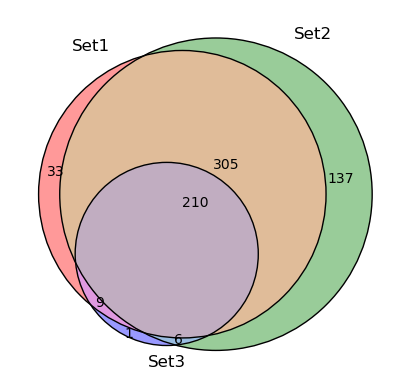

In [ ]:
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt

# Define your sets
set1 = set(polb_protein_id)
set2 = set(polb_hits_protein_id)
set3 = set(polb_hhblits_hits)

# Calculate intersections
only1 = set1 - set2 - set3
only2 = set2 - set1 - set3
only3 = set3 - set1 - set2

shared12 = (set1 & set2) - set3
shared13 = (set1 & set3) - set2
shared23 = (set2 & set3) - set1

shared123 = set1 & set2 & set3

# Create Venn diagram
#venn3([set1, set2, set3], set_labels=('Set1', 'Set2', 'Set3'))

venn3([set1, set2, set3], set_labels=('Set1', 'Set2', 'Set3'))
circles = venn3_circles([set1, set2, set3], linestyle='solid', linewidth=1, color="black")

plt.savefig("./figures/PolB_Pfam_vs_Network_vs_HHblits_search_venn_diagram.svg", format="svg")
plt.show()

False-positive hits in PolB network results:

- Poxvirus F12L proteins:
    - cluster 334 (42 members, CF-AAL73754.1_12006_relaxed): Foldseek hit to PolB probe E-value 8.562000e-13

- Herpesvirus DNA helicase/primase complex associated proteins:
    - cluster 244 (56 members, CF-QBM10893.1_81_relaxed): Network hit to cluster 36 (E-value 9.602e-11) and cluster 230 (E-value 8.16e-10)
    - cluster 405 (37 members, CF-QBN85127.1_95_relaxed): Network hit to cluster 36 (E-value 7.841e-11) and cluster 230 (E-value 4.033e-10)

Clusters 36 and 230 are true-positive hits:
    - cluster 36 (164 members, DNA polymerase family B, CF-CCA61358.1_11896_relaxed): Foldseek hit to PolB probe E-value 4.869000e-10
    - cluster 230 (58 members, DNA polymerase family B, CF-ADO00461.1_11945_relaxed): Foldseek hit to PolB probe E-value 4.334000e-10

In [28]:
df_pfam[df_pfam['Viro3D ID'].isin(list(set(polb_hits_protein_id) - set(polb_protein_id)))]['Signature Description'].value_counts()

Signature Description
Herpesvirus DNA helicase/primase complex associated protein    87
Poxvirus F12L protein                                          42
Herpesvirus helicase-primase complex component                 18
Name: count, dtype: int64

In [30]:
helicase_protein_ids = df_pfam[df_pfam['Viro3D ID'].isin(list(set(polb_hits_protein_id) - set(polb_protein_id))) &
        (df_pfam['Signature Description'] == 'Herpesvirus DNA helicase/primase complex associated protein')]['Viro3D ID'].unique()

In [29]:
f12l_protein_ids = df_pfam[df_pfam['Viro3D ID'].isin(list(set(polb_hits_protein_id) - set(polb_protein_id))) &
        (df_pfam['Signature Description'] == 'Poxvirus F12L protein')]['Viro3D ID'].unique()

In [32]:
primase_protein_ids = df_pfam[df_pfam['Viro3D ID'].isin(list(set(polb_hits_protein_id) - set(polb_protein_id))) &
        (df_pfam['Signature Description'] == 'Herpesvirus helicase-primase complex component')]['Viro3D ID'].unique()

In [37]:
len(helicase_protein_ids), len(f12l_protein_ids)

(87, 42)

In [32]:
df_proteins[df_proteins['Viro3D ID'].isin(helicase_protein_ids)].sort_values(by=['ColabFold pLDDT']).tail(5)

,ICTV Sort,ICTV Species,Viro3D ID,Viro3D Name,Peptide Category,GenBank Protein ID,UniProt ID,Protein Length,GenBank Genome Accession,GenBank Genome Coordinates,ESMFold pLDDT,ESMFold pTM,ColabFold pLDDT,ColabFold pTM,ColabFold median MSA depth,Protein Sequence
3078,64,Simplexvirus humanalpha2,AEV91346.1_64,Gene: UL8; Product: helicase-primase subunit,protein,AEV91346.1,G9I229,752,JN561323.2,[18445:20703](-),48.2,0.470,90.9,0.89,82.0,MEAPGIVWVEESVSAITLYAVWLPPRTRDCLHALLYLVCRDAAGEA...
4038,77,Varicellovirus bovinealpha1,AFV53411.1_77,Gene: UL8; Product: component of DNA helicase/...,protein,AFV53411.1,K4P1J6,748,JX898220.1,[88696:90942](+),52.0,0.561,90.9,0.90,82.0,MPVSHSNGCVCGVSLYSAWAAGPDRARVLLALLCRMDDGGCDAKFA...
4111,78,Varicellovirus bovinealpha5,AAR86154.1_78,Product: UL8 component of DNA helicase/primase...,protein,AAR86154.1,Q6X219,757,AY261359.1,[90216:92489](+),49.5,0.544,91.0,0.90,81.0,MPVSYSTGCICGVSLYSAWAAGPDRARVLLALLCRRGDGGCDAVFA...
4936,89,Varicellovirus equidalpha6,QPI70164.1_89,Product: helicase-primase subunit,protein,QPI70164.1,A0A7S9VN03,752,MT012704.1,[96345:98603](+),47.9,0.491,91.4,0.90,82.0,MAGRDVEWAAGCVCATSIYSTWTDPADPGALQALVHLLCRREGGDY...
4335,81,Varicellovirus caprinealpha1,QBM10893.1_81,Gene: UL8; Product: DNA helicase/primase compl...,protein,QBM10893.1,A0AAF1D214,737,MG989243.1,[84447:86660](+),50.7,0.528,92.9,0.90,82.0,MPVTYSVGCVCSVALYSAWAASPDRARVLLYLLCRESDGSCDAKFA...


In [30]:
df_proteins[df_proteins['Viro3D ID'].isin(f12l_protein_ids)].sort_values(by=['ColabFold pLDDT']).tail(5)

,ICTV Sort,ICTV Species,Viro3D ID,Viro3D Name,Peptide Category,GenBank Protein ID,UniProt ID,Protein Length,GenBank Genome Accession,GenBank Genome Coordinates,ESMFold pLDDT,ESMFold pTM,ColabFold pLDDT,ColabFold pTM,ColabFold median MSA depth,Protein Sequence
51578,12005,Akhmeta virus,AXN74841.1_12005,Product: IEV maturation protein,protein,AXN74841.1,A0A346FS18,636,MH607141.1,[53667:55577](-),50.4,0.513,88.7,0.85,63.0,MLNRVQILMKTANNYETIEILRNYLRLYIILARNEEGRGILIYDDN...
52023,12007,Cowpox virus,AAM13505.1_12007,Gene: CPXV060 CDS; Product: CPXV060 protein,protein,AAM13505.1,Q8QN06,634,AF482758.2,[55566:57470](-),59.6,0.535,88.7,0.85,63.0,MLNRIQTLMKTANNYETIEILRNYLRLYIILARNEEGRGILIYDDN...
52596,12010,Raccoonpox virus,AKJ93679.1_12010,Product: Exclusive to IEV,protein,AKJ93679.1,A0A0G3FZY6,637,KP143769.1,[45173:47086](-),58.4,0.607,88.9,0.86,62.0,MLRRIQTLLQTANDYETIEILRNYLRLYMILARNEEGRGIIIYNDN...
52392,12009,Monkeypox virus,AAL40502.1_12009,Gene: C18L; Note: similar to Vaccinia virus st...,protein,AAL40502.1,Q8V536,635,AF380138.1,[39154:41061](-),57.2,0.538,89.1,0.86,62.0,MLNRIQTLMKTANNYETIEILRNYLRLYIILARNEEGRGILIYDDN...
51796,12006,Camelpox virus,AAL73754.1_12006,Product: putative EEV maturation protein,protein,AAL73754.1,Q8V2X0,635,AF438165.1,[41769:43676](-),56.6,0.540,89.4,0.86,62.0,MLNRVQILMKTANNYETIEILRNYLRLYIILARNEEGHGILIYDDN...


In [26]:
df_proteins[df_proteins['Viro3D ID'].isin(list(set(polb_hits_protein_id) - set(polb_protein_id)))].sort_values(by=['ColabFold pLDDT']).tail(5)

,ICTV Sort,ICTV Species,Viro3D ID,Viro3D Name,Peptide Category,GenBank Protein ID,UniProt ID,Protein Length,GenBank Genome Accession,GenBank Genome Coordinates,ESMFold pLDDT,ESMFold pTM,ColabFold pLDDT,ColabFold pTM,ColabFold median MSA depth,Protein Sequence
4038,77,Varicellovirus bovinealpha1,AFV53411.1_77,Gene: UL8; Product: component of DNA helicase/...,protein,AFV53411.1,K4P1J6,748,JX898220.1,[88696:90942](+),52.0,0.561,90.9,0.90,82.0,MPVSHSNGCVCGVSLYSAWAAGPDRARVLLALLCRMDDGGCDAKFA...
3078,64,Simplexvirus humanalpha2,AEV91346.1_64,Gene: UL8; Product: helicase-primase subunit,protein,AEV91346.1,G9I229,752,JN561323.2,[18445:20703](-),48.2,0.470,90.9,0.89,82.0,MEAPGIVWVEESVSAITLYAVWLPPRTRDCLHALLYLVCRDAAGEA...
4111,78,Varicellovirus bovinealpha5,AAR86154.1_78,Product: UL8 component of DNA helicase/primase...,protein,AAR86154.1,Q6X219,757,AY261359.1,[90216:92489](+),49.5,0.544,91.0,0.90,81.0,MPVSYSTGCICGVSLYSAWAAGPDRARVLLALLCRRGDGGCDAVFA...
4936,89,Varicellovirus equidalpha6,QPI70164.1_89,Product: helicase-primase subunit,protein,QPI70164.1,A0A7S9VN03,752,MT012704.1,[96345:98603](+),47.9,0.491,91.4,0.90,82.0,MAGRDVEWAAGCVCATSIYSTWTDPADPGALQALVHLLCRREGGDY...
4335,81,Varicellovirus caprinealpha1,QBM10893.1_81,Gene: UL8; Product: DNA helicase/primase compl...,protein,QBM10893.1,A0AAF1D214,737,MG989243.1,[84447:86660](+),50.7,0.528,92.9,0.90,82.0,MPVTYSVGCVCSVALYSAWAASPDRARVLLYLLCRESDGSCDAKFA...


In [46]:
df_pfam[df_pfam['Viro3D ID'].isin(foldseek_polb_hits)]['Signature Description'].value_counts()

Signature Description
DNA polymerase family B                                   369
DNA polymerase family B, exonuclease domain               321
DNA polymerase type B, organellar and viral               173
DNA polymerase family B viral insert                       51
Poxvirus F12L protein                                      42
DNA polymerase family B exonuclease domain, N-terminal     42
DNA polymerase catalytic subunit Pol                       22
RNase_H superfamily                                         2
Name: count, dtype: int64

## Virus isolates overlap

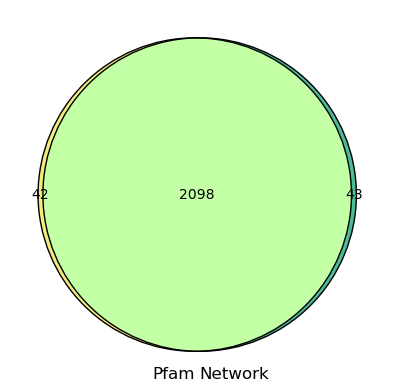

In [70]:
# import modules 
from matplotlib_venn import venn2,venn2_circles 
from matplotlib import pyplot as plt 

# depict venn diagram 
venn2(
    subsets = (42, 43, 2098), 
	set_labels = ('Pfam', 'Network'), 
	set_colors=("#F0E442", "#009E73"),
    alpha=0.7)

# add outline 
venn2_circles(
    subsets=(42, 43, 2098),
    linestyle="solid",
    linewidth=1) 

plt.savefig("pfam/RdRp_Pfam_vs_Network_search_venn_diagram.svg", format="svg")
plt.show()

In [87]:
df_viruses[df_viruses['ICTV Sort'].isin(list(set(rdrp_hits_virus_sort) - set(rdrp_virus_sort)))]['ICTV Family'].value_counts()

ICTV Family
Sedoreoviridae      17
Qinviridae           7
Nodaviridae          6
Mesoniviridae        4
Hypoviridae          2
Euroniviridae        1
Mononiviridae        1
Nairoviridae         1
Picobirnaviridae     1
Phasmaviridae        1
Picornaviridae       1
Yueviridae           1
Name: count, dtype: int64

In [88]:
df_viruses[df_viruses['ICTV Sort'].isin(list(set(rdrp_hits_virus_sort) & set(rdrp_virus_sort)))]['ICTV Family'].value_counts()

ICTV Family
Picornaviridae         552
Rhabdoviridae          234
Peribunyaviridae       188
Flaviviridae           144
Phenuiviridae          140
Paramyxoviridae         86
Arenaviridae            67
Coronaviridae           57
Hantaviridae            52
Nairoviridae            46
Togaviridae             42
Chuviridae              42
Spinareoviridae         38
Lispiviridae            30
Caliciviridae           27
Hepeviridae             24
Arteriviridae           23
Nyamiviridae            22
Orthomyxoviridae        21
Sedoreoviridae          20
Tobaniviridae           20
Astroviridae            20
Bornaviridae            20
Dicistroviridae         16
Birnaviridae            16
Iflaviridae             16
Filoviridae             16
Phasmaviridae           15
Xinmoviridae            14
Nodaviridae             12
Aliusviridae            12
Mesoniviridae           10
Polycipiviridae          8
Artoviridae              8
Roniviridae              4
Picobirnaviridae         4
Pneumoviridae   

In [80]:
df_viruses[df_viruses['ICTV Sort'].isin(list(set(rdrp_virus_sort) - set(rdrp_hits_virus_sort)))]['ICTV Family'].value_counts()

ICTV Family
Phasmaviridae        13
Hantaviridae          5
Rhabdoviridae         5
Phenuiviridae         4
Arenaviridae          3
Alphatetraviridae     3
Nairoviridae          2
Cremegaviridae        1
Bornaviridae          1
Caliciviridae         1
Orthomyxoviridae      1
Mypoviridae           1
Matonaviridae         1
Wupedeviridae         1
Name: count, dtype: int64

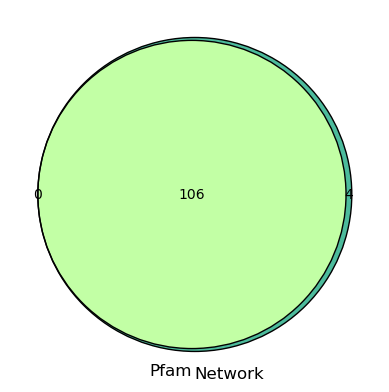

In [71]:
# import modules 
from matplotlib_venn import venn2,venn2_circles 
from matplotlib import pyplot as plt 

# depict venn diagram 
venn2(
    subsets = (0, 4, 106), 
	set_labels = ('Pfam', 'Network'), 
	set_colors=("#F0E442", "#009E73"),
    alpha=0.7)

# add outline 
venn2_circles(
    subsets=(0, 4, 106),
    linestyle="solid",
    linewidth=1) 

plt.savefig("pfam/RT_Pfam_vs_Network_search_venn_diagram.svg", format="svg")
plt.show()

In [85]:
df_viruses[df_viruses['ICTV Sort'].isin(list(set(rt_hits_virus_sort) - set(rt_virus_sort)))]['ICTV Family'].value_counts()

ICTV Family
Belpaoviridae    4
Name: count, dtype: int64

In [86]:
df_viruses[df_viruses['ICTV Sort'].isin(list(set(rt_hits_virus_sort) & set(rt_virus_sort)))]['ICTV Family'].value_counts()

ICTV Family
Retroviridae      44
Hepadnaviridae    39
Metaviridae       18
Belpaoviridae      3
Pseudoviridae      2
Name: count, dtype: int64

In [78]:
df_viruses[df_viruses['ICTV Sort'].isin(list(set(rt_virus_sort) - set(rt_hits_virus_sort)))]['ICTV Family'].value_counts()

Series([], Name: count, dtype: int64)

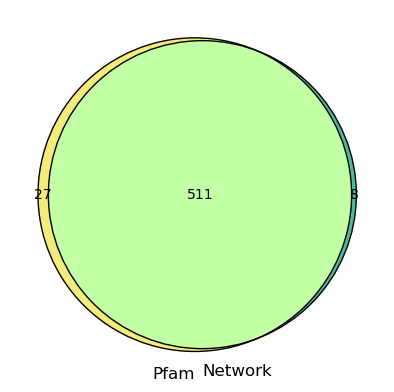

In [74]:
# import modules 
from matplotlib_venn import venn2,venn2_circles 
from matplotlib import pyplot as plt 

# depict venn diagram 
venn2(
    subsets = (27, 8, 511), 
	set_labels = ('Pfam', 'Network'), 
	set_colors=("#F0E442", "#009E73"),
    alpha=0.7)

# add outline 
venn2_circles(
    subsets=(27, 8, 511),
    linestyle="solid",
    linewidth=1) 

plt.savefig("pfam/PolB_Pfam_vs_Network_search_venn_diagram.svg", format="svg")
plt.show()

In [83]:
df_viruses[df_viruses['ICTV Sort'].isin(list(set(polb_hits_virus_sort) - set(polb_virus_sort)))]['ICTV Family'].value_counts()

ICTV Family
Nudiviridae           5
Orthoherpesviridae    2
Adintoviridae         1
Name: count, dtype: int64

In [84]:
df_viruses[df_viruses['ICTV Sort'].isin(list(set(polb_hits_virus_sort) & set(polb_virus_sort)))]['ICTV Family'].value_counts()

ICTV Family
Adenoviridae          164
Orthoherpesviridae    109
Baculoviridae         100
Poxviridae             51
Iridoviridae           47
Asfarviridae           12
Alloherpesviridae      10
Nudiviridae             9
Ascoviridae             5
Hytrosaviridae          2
Bidnaviridae            1
Adintoviridae           1
Name: count, dtype: int64

In [76]:
df_viruses[df_viruses['ICTV Sort'].isin(list(set(polb_virus_sort) - set(polb_hits_virus_sort)))]['ICTV Family'].value_counts()

ICTV Family
Nimaviridae            13
Adenoviridae            8
Malacoherpesviridae     2
Orthoherpesviridae      1
Alloherpesviridae       1
Ascoviridae             1
Poxviridae              1
Name: count, dtype: int64